# Introduction

François HU - Data scientist au DataLab de la Société Générale Assurances - *19/11/19* - https://nbviewer.jupyter.org/github/curiousML/DSA/tree/master/text_mining/

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## 1. Quelques prérequis

<font color = "grey">*cacher le code</font>

In [299]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

### Machine learning / Deep learning

### Proba / Stat

### Algèbre linéaire

### Python

## 2. Définitions et préprocessing

<font color = "grey">*afficher le code</font>

In [299]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="cacher / afficher code"></form>''')

### Tokenization

- <font color = "green"><b>Texte</b></font> : séquence de mots

- <font color = "green"><b>Mot</b></font> : séquence logique de caractères

- <font color = "green"><b>Tokenization</b></font> : processus qui sépare une séquence (texte) en une liste de tokens (mots)

- **question** : comment trouver les limites d'un mot ? 
<font color = "gray">En français / anglais, nous pouvons séparer les mots par les <b>espaces</b> et les <b>ponctuations</b></font>

- **input** : ``"Devons-nous, mon collègue et moi, vous recontacter?"``

- **output** : ``["Devons", "nous", "mon", "collègue", "et", "moi", "vous", "recontacter"]``

In [123]:
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, word_tokenize
text = "J'ai une question : devons-nous, mon collègue et moi, vous recontacter?"

**Implémentations avec python**

- **exemple 1** : tokenization par les espaces

In [64]:
tokenizer = WhitespaceTokenizer()
print(tokenizer.tokenize(text))

["J'ai", 'une', 'question', ':', 'devons-nous,', 'mon', 'collègue', 'et', 'moi,', 'vous', 'recontacter?']


- **exemple 2** : tokenization par les ponctuations

In [61]:
tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize(text))

['J', "'", 'ai', 'une', 'question', ':', 'devons', '-', 'nous', ',', 'mon', 'collègue', 'et', 'moi', ',', 'vous', 'recontacter', '?']


- **exemple 3** : tokenization par un ensemble de règles

In [62]:
print(word_tokenize(text, language='french'))

["J'ai", 'une', 'question', ':', 'devons-nous', ',', 'mon', 'collègue', 'et', 'moi', ',', 'vous', 'recontacter', '?']


### Normalisation des tokens : racinisation et lemmatisation

- <font color = "green"><b>Stemming</b></font> : garder la racine d'un terme (souvent, enlever une partie de la fin du terme)

- **exemple** : 

continu<font color = "red">a</font>, continu<font color = "red">ait</font>, continu<font color = "red">ant</font>, continu<font color = "red">ation</font>, continu<font color = "red">ations</font>, continu<font color = "red">e</font> $\to$ continu

- <font color = "green"><b>Lemmatisation</b></font> : ramener un terme à sa forme la plus simple (infinitif ou masculin-singulier)

- **exemple** : 

continua, continuait, continuant $\to$ <font color = "red">continuer</font>

continuations, continuation $\to$ <font color = "red">continuation</font>

continue $\to$ <font color = "red">continu / continuer</font> (adjectif / verbe)

**Implémentations avec python**

In [ ]:
#! pip install -U spaCy
#! python -m spacy download fr
#! python -m spacy download fr_core_news_md

- **exemple 1** : racinisation (stemming)

In [ ]:
#text = "J' ai une question : devons - nous, mon collègue et moi, vous recontacter?"

In [122]:
from nltk.stem import SnowballStemmer
fr = SnowballStemmer('french')
" ".join(fr.stem(token) for token in word_tokenize(text))

"j ' ai une question : devon - nous , mon collègu et moi , vous recontact ?"

- **exemple 2** : Lemmatisation

In [117]:
import spacy
nlp = spacy.load('fr_core_news_md')
" ".join(token.lemma_ for token in nlp(text))

'je avoir un question : devoir - nous , mon collègue et moi , vous recontacter ?'

### Autres types de normalisation

Les expressions régulières en Python nécessitent d'importer le module natif **re** : https://fr.wikibooks.org/wiki/Programmation_Python/Regex

In [205]:
import re
text_b = ("<b>" + text + "</b>").lower()
print(text_b)

<b>j'ai une question : devons-nous, mon collègue et moi, vous recontacter?</b>


- supprimer les **balises** : ``<...> ... </...>``

In [206]:
text_b = re.sub("<.*?>", " ", text_b) # balises <...>
print(text_b)

 j'ai une question : devons-nous, mon collègue et moi, vous recontacter? 


- supprimer les **ponctuations** et les grands espaces : ``-, !, ?, :, ...``

In [207]:
import string
text_b = re.sub(r"[" + string.punctuation + r"]", " ", text_b) # ponctuations
text_b = re.sub(r"\s+", " ", text_b) # grands espaces
print(text_b)

 j ai une question devons nous mon collègue et moi vous recontacter 


### Stop-words

- <font color = "green"><b>Stop-words</b></font> : ensemble de mots fréquemment utilisés dans une langue et qui n'apportent pas de signification importante

- **exemple** : ``a, à, des, de, et, est, un, ...``

**implémentations avec python : supprimer les stopwords**

In [215]:
from nltk.corpus import stopwords
# Chargement des stopwords pour la langue francaise avec NLTK
stopwords_lst = list(stopwords.words("french"))
re.sub(r"(\s+|^)(" + r"|".join(stopwords_lst) + r")(\s+|$)", " ", text)

"J'ai question : devons-nous, collègue moi, recontacter?"

**Résumé** :

- tokenisation

- Normalisation des tokens : racinisation et lemmatisation
    
- Stop-words

## 3. Vectorisation des données textuelles

<font color = "grey">*cacher le code</font>

In [7]:
from IPython.display import HTML, Image
HTML('''<script>code_show=true; function code_toggle() {
            if (code_show){$('div.input').hide();} 
            else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);
        </script><form action="javascript:code_toggle()">
        <input type="submit" value="cacher / afficher code"></form>''')

### Données textuelles en données tabulaires

- processus d'apprentissage pour des **données tabulaires** :

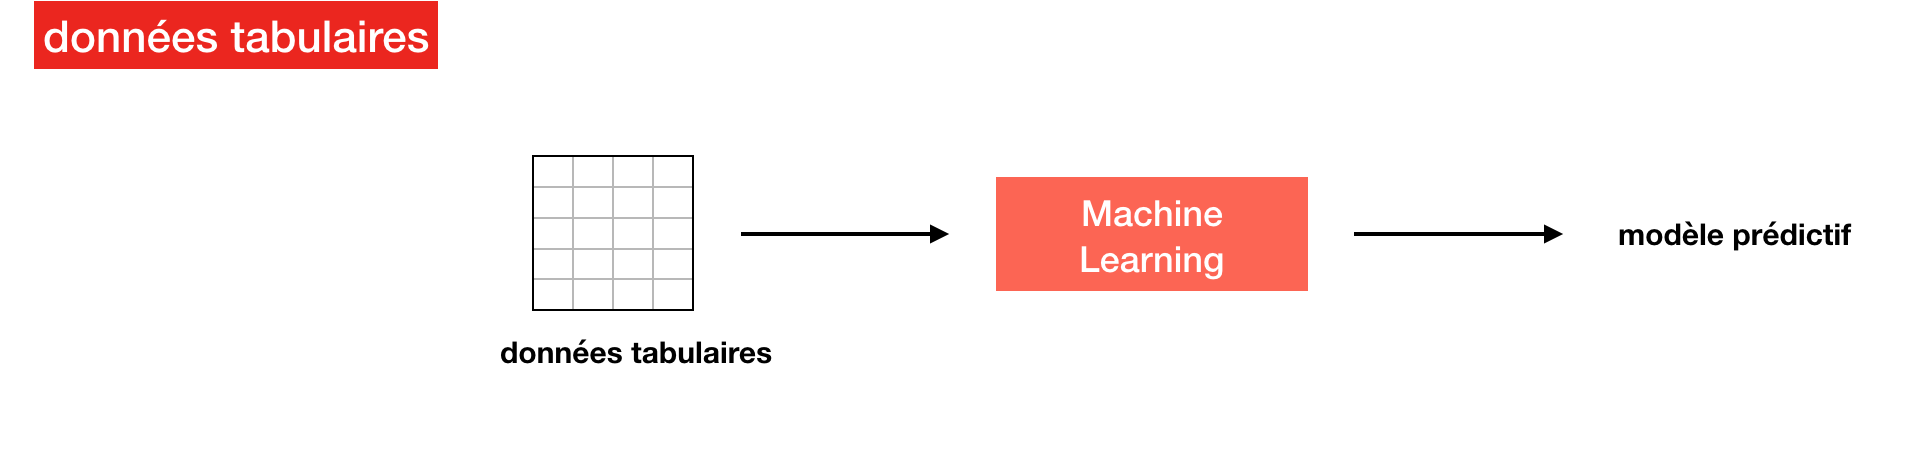

In [302]:
Image("img/MLtab.png", width=600, height = 200)

- pour des **données textuelles** :

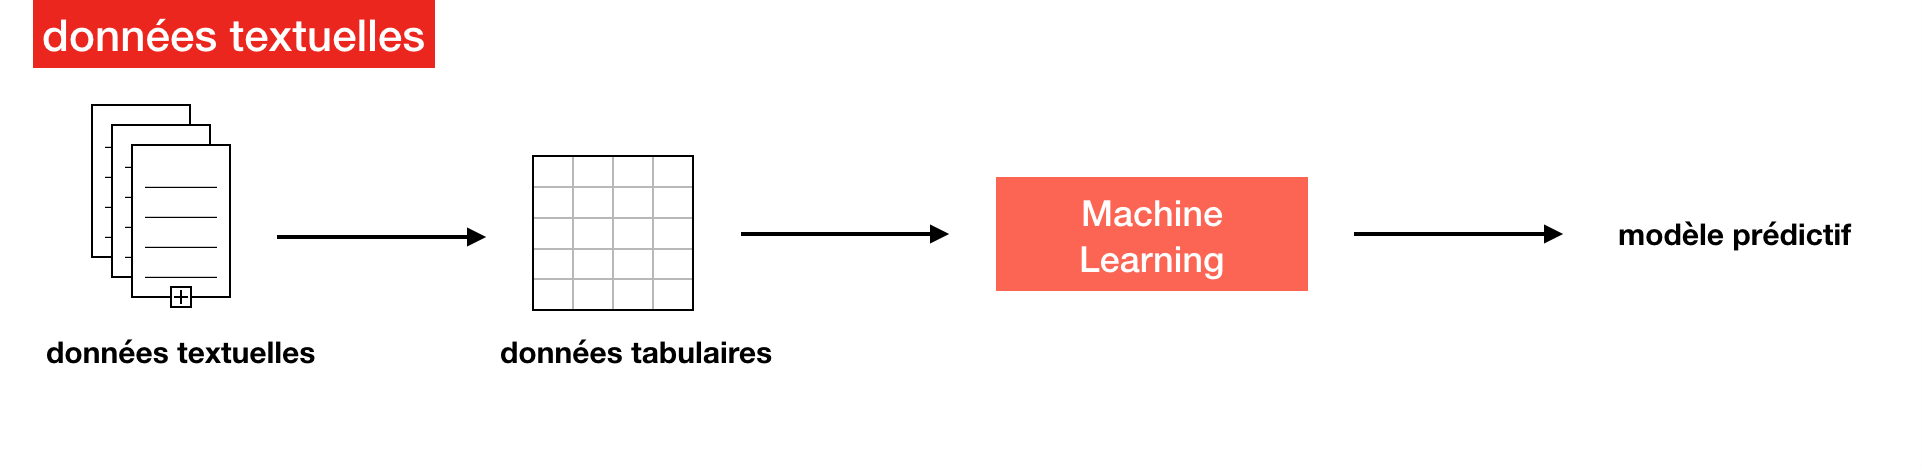

In [301]:
Image("img/MLtext.png", width=600, height = 200)

- **approches** : (<font color = "red">section suivante</font>) TF-IDF et (<font color = "red">cours 1</font>) word embedding

### Modèles de vectorisation des textes

**1. approche bag-of-words**

- compter le nombre d'occurences d'un token $t$ dans le document $d$ : $f_{t,d}$

- **exemple** : méthode de comptage

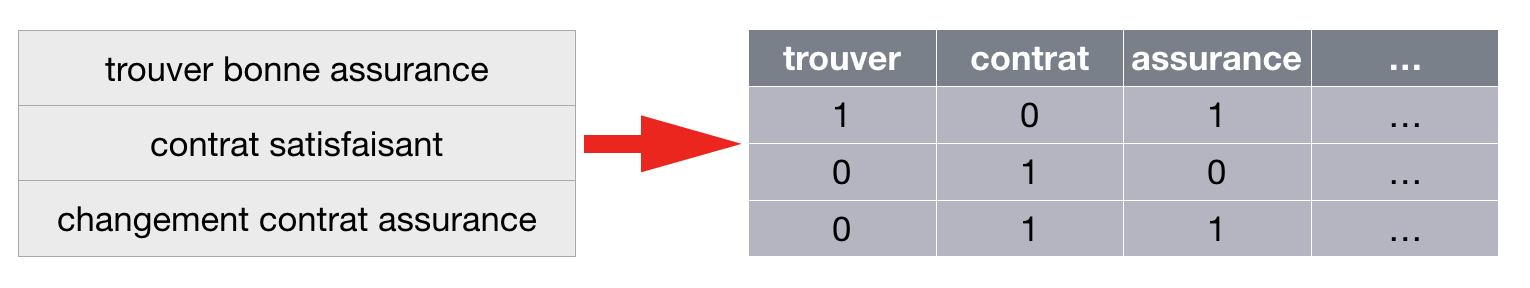

In [297]:
Image("img/BOW_example.png", width=1000, height = 200)

- **problème** : pas d'ordre entre les mots

- **solution** : approche n-grammes

**2. approche n-grammes** (n-grams en anglais)

- compter le nombre d'occurences des paires de tokens (2-grams), des triplets de tokens (3-grams), ...

- **exemple** : méthode de comptage (1,2)-grammes

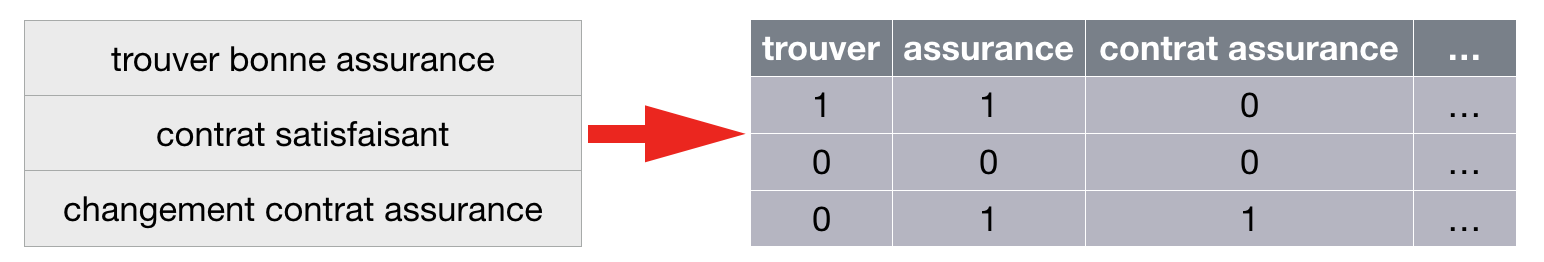

In [298]:
Image("img/ngrams_example.png", width=1000, height = 200)

- **problème** : trop de variables

- **solution** : supprimer les stop-words et qq n-grammes (très **hautes** et très **basses** fréquences)

**3. approche TF-IDF**

- <font color = "green"><b>Term Frequency</b></font> : nombre d'occurrences d'un token / n-grams $t$ dans le document $d$ $$\text{tf}(t, d) = f_{t,d}$$

- **variantes** : $\frac{f_{t,d}}{\sum\limits_{t'\in d}f_{t',d}}$ ou $\mathbb{1}(t\in d)$ ou $(1 + \log{f_{t,d})}$, ...

- <font color = "green"><b>Inverse Document Frequency</b></font> : mesure l'importance du token / n-grams dans l'ensemble du corpus $$\text{idf}(t, D) = \log\frac{|D|}{|\{d \ | \ t\in d\}|} = \log\frac{\text{# documents}}{\text{# documents contenant le terme } t}$$

- <font color = "green"><b>Term Frequency - Inverse Document Frequency (TF-IDF)</b></font> : $$\text{tfidf}(t, d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D)$$

- **exemple** : approche TF-IDF (1,2)-grammes

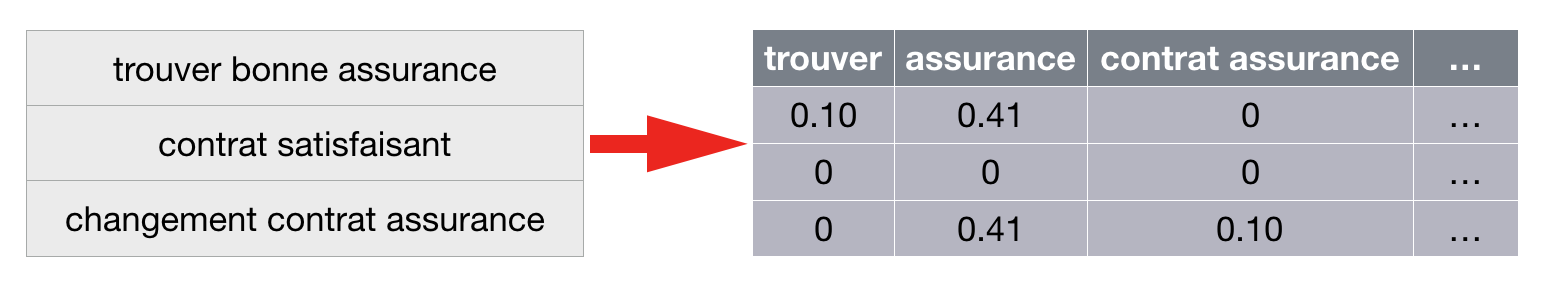

In [8]:
Image("img/TFIDF_example.png", width=1000, height = 200)

- **implémentations avec python** :

``from sklearn.feature_extraction.text import TfidfVectorizer``

``tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))``

``features = tfidf.fit_transform(texts)``

In [59]:
import pandas as pd
texts = [
    "bon film",
    "pas un bon film",
    "je n'aime pas",
    "j'aime",
    "très bien"
]
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns = tfidf.get_feature_names()
)

,aime,bon,bon film,film,pas
0,0.000000,0.57735,0.57735,0.57735,0.000000
1,0.000000,0.50000,0.50000,0.50000,0.500000
2,0.707107,0.00000,0.00000,0.00000,0.707107
3,1.000000,0.00000,0.00000,0.00000,0.000000
4,0.000000,0.00000,0.00000,0.00000,0.000000


- voir **cours 1** pour des techniques de vectorisation plus avancées

**Résumé :**

- vectorisation par comptage (bag-of-words)

- vectorisation par comptage, ajouter n-grammes

- remplacer les occurrences par les valeurs TF-IDF